In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [47]:
label_encoder = LabelEncoder()
x_df = X[['ShapeFactor1', 'Compactness']]
y_df = label_encoder.fit_transform(y['Class'])

Text(0, 0.5, 'Compactness')

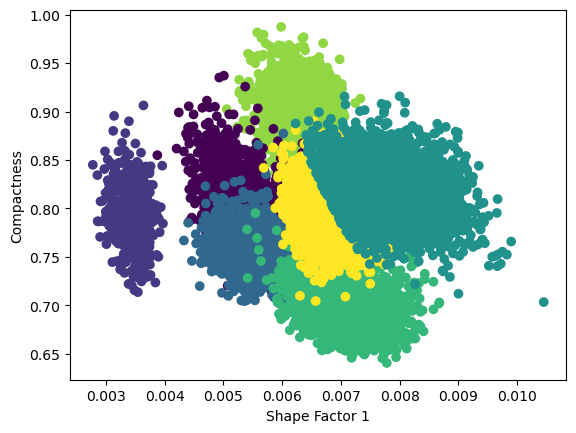

In [49]:
# we see distinct clusters 

plt.scatter(x_df['ShapeFactor1'], x_df['Compactness'], c=y_df)
plt.xlabel('Shape Factor 1')
plt.ylabel('Compactness')

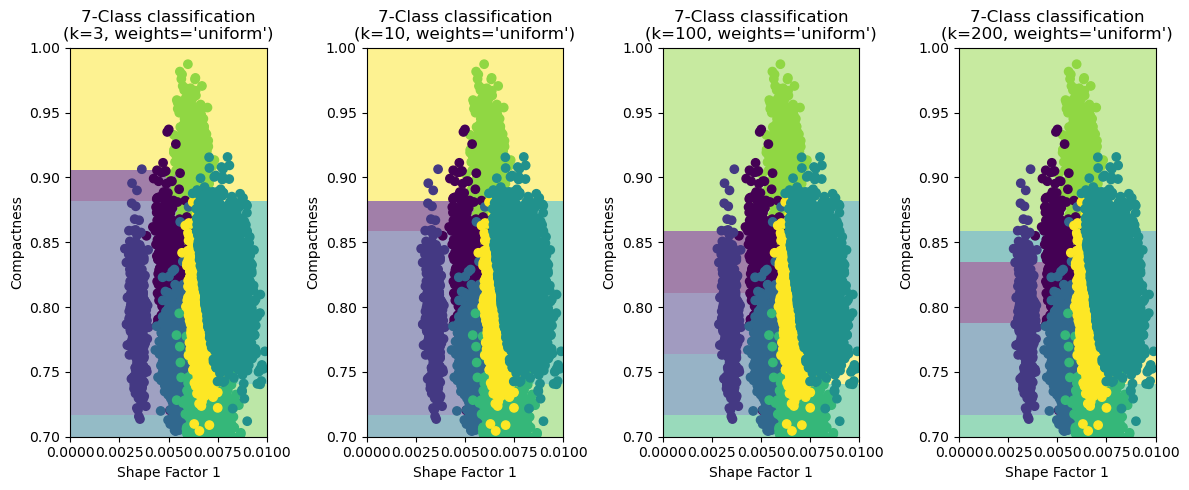

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, stratify=y_df, random_state=42)
ks2Try = [3, 10, 100, 200] # greater k, means less stringent neighbor status 
fig, axs = plt.subplots(ncols=len(ks2Try), figsize=(12, 5))
# Iterate over different values of k
for i, k in enumerate(ks2Try):
    # Train a k-nearest neighbors classifier with uniform weights
    knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn_model.fit(X_train, y_train)

    # Plot decision boundaries for uniform weight setting
    disp = DecisionBoundaryDisplay.from_estimator(
        knn_model,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='Shape Factor 1',
        ylabel='Compactness',
        shading="auto",
        alpha=0.5,
        ax=axs[i]  # Use the current subplot
    )
    scatter = disp.ax_.scatter(X['ShapeFactor1'], X['Compactness'], c=y_df)

    # disp.ax_.legend(
    #     scatter.legend_elements()[0],
    #     dry_bean.target_names,
    #     loc="lower left",
    #     title="Classes",
    # )
    disp.ax_.set_title( 
        f"7-Class classification\n(k={k}, weights='uniform')"
    )

    disp.ax_.set_xlim(0, 0.01)
    disp.ax_.set_ylim(0.7, 1)

plt.tight_layout()
plt.show()

In [68]:
# Initialize lists to store k values and corresponding accuracies
k_values = range(1,300)
accuracy_list = []
k_list = []
# Iterate over different values of k
for k in k_values:
    # Train the k-nearest neighbors classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Evaluate the model's performance
    accuracy = knn_model.score(X_test, y_test)
    
    # Store k and accuracy in lists
    k_list.append(k)
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

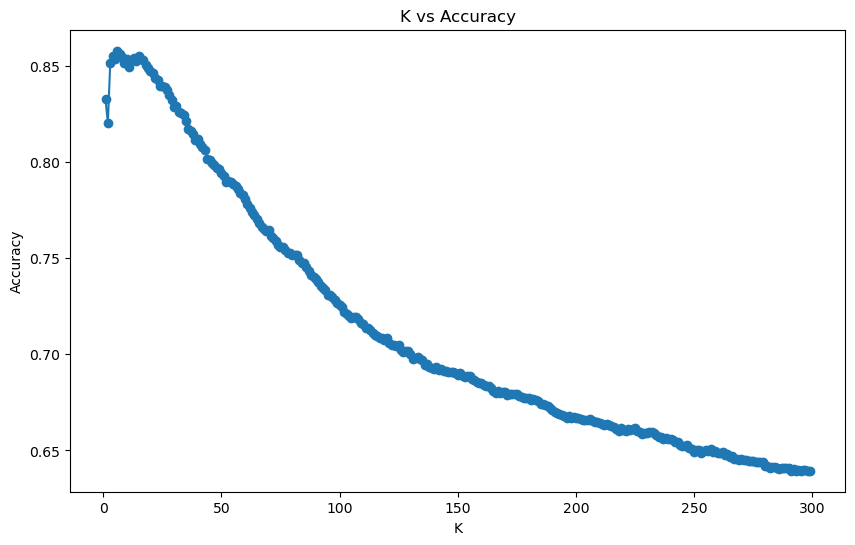

In [71]:
# Plot k stringency against prediction accuracy 
plt.figure(figsize=(10, 6))
plt.plot(k_list, accuracy_list, marker='o', linestyle='-')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')


Now that we see the effect of choosing k, let's choose a k that maximizes our accuracy in this context. 

In [77]:
accuracy_list.index(max(accuracy_list))

5

Ok, so that's k=5, and we'll set that for our final implementation. 

array([[228,   0,  70,   0,   0,  16,  16],
       [  3, 120,   6,   0,   0,   1,   0],
       [ 58,   0, 331,   0,  15,   2,   2],
       [  0,   0,   0, 771,   3,  23,  90],
       [  1,   0,  16,   6, 442,   0,  17],
       [  2,   0,   0,  15,   0, 475,  15],
       [  4,   0,   3,  85,  14,  15, 538]], dtype=int64)

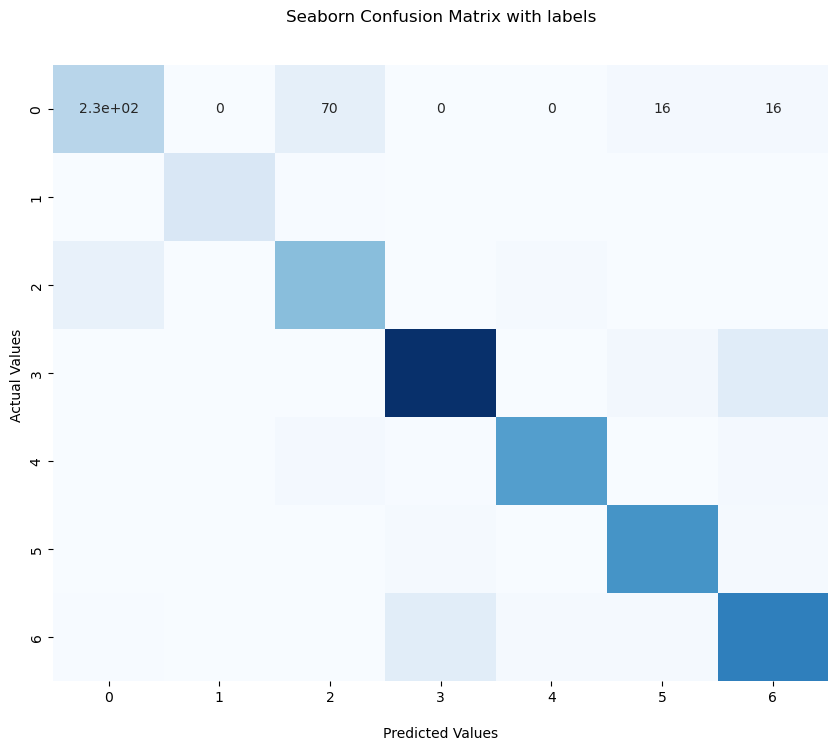

In [82]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) # rendering problems... 

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
cf_matrix


The diagonal is pretty distinct compared to the other squares! 

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       330
           1       1.00      0.92      0.96       130
           2       0.78      0.81      0.79       408
           3       0.88      0.87      0.87       887
           4       0.93      0.92      0.92       482
           5       0.89      0.94      0.91       507
           6       0.79      0.82      0.80       659

    accuracy                           0.85      3403
   macro avg       0.86      0.85      0.86      3403
weighted avg       0.85      0.85      0.85      3403



## Classification Results Summary and Analysis

The following table summarizes the performance metrics of a multi-class classification model for predicting the types of beans based on various features. Each class corresponds to a specific type of bean:

| Class    | Precision | Recall | F1-score | Support |
|----------|-----------|--------|----------|---------|
| Seker    | 0.77      | 0.69   | 0.73     | 330     |
| Barbunya | 1.00      | 0.92   | 0.96     | 130     |
| Bombay   | 0.78      | 0.81   | 0.79     | 408     |
| Cali     | 0.88      | 0.87   | 0.87     | 887     |
| Dermosan | 0.93      | 0.92   | 0.92     | 482     |
| Horoz    | 0.89      | 0.94   | 0.91     | 507     |
| Sira     | 0.79      | 0.82   | 0.80     | 659     |

- **Accuracy**: 0.85
- **Macro avg (weighted avg)**:
  - Precision: 0.86
  - Recall: 0.85
  - F1-score: 0.86
- **Weighted avg**:
  - Precision: 0.85
  - Recall: 0.85
  - F1-score: 0.85

### Analysis:

The classification model achieves an overall accuracy of 85%, indicating that it correctly classifies the majority of bean samples. The precision, recall, and F1-score metrics provide insights into the model's performance for each bean class.

- **Class-Specific Performance**:
  - The model performs well for classes Barbunya, Dermosan, and Horoz, with high precision, recall, and F1-score values exceeding 0.90.
  - Class Cali also exhibits good performance, with precision, recall, and F1-score values around 0.88 to 0.87.
  - Classes Seker, Bombay, and Sira have slightly lower performance metrics, with precision, recall, and F1-score values ranging from 0.73 to 0.79.

- **Overall Model Performance**:
  - The macro-averaged and weighted-averaged metrics indicate consistent performance across classes, with precision, recall, and F1-score values averaging around 0.85 to 0.86.
  - This suggests that the model maintains a balanced performance across all bean types, with no significant bias towards specific classes.

Further analysis and optimization may be required to improve the model's performance for classes with lower precision and recall values, such as Seker, Bombay, and Sira. Additionally, feature engineering and parameter tuning could potentially enhance the overall accuracy and robustness of the classification model.
